
![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Tarea numero 4**

**Predicción del Valor de Venta de Inmuebles***

**Metodos Estadisticos** <br>

Profesor: Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas
- Andrea Catalina Gomez
- Luisa Fernanda Rodriguez

# Introducción
En este ejercicio, analizarás un conjunto de datos de inmuebles para predecir el valor de venta (`valor_venta`) en función de sus características. Utilizarás tres modelos
- **Regresión Lineal**
- **Árbol de Decisión**
- **Random Forest**

 El proceso incluirá limpieza de datos, análisis exploratorio y evaluación del desempeño de los modelos.

---

## Descripción de las columnas
1. **`tipo_inmueble`**: Tipo de propiedad (e.g., Apartamento, Casa).
2. **`valor_venta`**: Valor de venta del inmueble en pesos colombianos.
3. **`area`**: Área del inmueble en metros cuadrados.
4. **`nro_cuartos`**: Número de cuartos en la propiedad.
5. **`nro_banos`**: Número de baños en la propiedad.
6. **`nro_garajes`**: Número de garajes disponibles.
7. **`zona`**: Zona geográfica donde se encuentra el inmueble (e.g., Chapinero, Norte).
8. **`barrio`**: Nombre específico del barrio.
9. **`nombre_comun_barrio`**: Nombre común asociado al barrio.

---

El ejercicio debe cubrir los siguientes pasos:

***Parte 1: Limpieza de datos***
1. Ajusta el tipo de dato de cada columna según su naturaleza (numérica o categórica).
2. Maneja valores nulos imputándolos.

***Parte 2: Análisis exploratorio de datos (EDA)***
1. Genera estadísticas descriptivas de las variables.
2. Visualiza distribuciones y relaciones entre variables predictoras y la variable objetivo.
3. Analiza cómo cambian las categorías en relación con la variable objetivo.

***Parte 3: Construcción y evaluación de modelos***
1. Divide los datos en conjuntos de entrenamiento (80%) y prueba (20%).
2. Construye y ajusta los siguientes modelos:
   - **Regresión Lineal**.
   - **Árbol de Decisión**.
   - **Random Forest**.
3. Evalúa el desempeño de los modelos utilizando métricas como **MAE**, **MAPE**, **RMSE**.
4. Realiza un análisis residual para diagnosticar posibles problemas.


***Notas***
- Justifica todas las decisiones tomadas.
- Identifica y analiza el impacto de valores atípicos.
- Si deseas puedes hacer transformacion de variables (es necesario para todos los modelos?)

In [35]:
import pandas as pd
data_tarea4 = pd.read_csv("https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/tarea4_regresion.csv")

In [36]:
# Librerias a utilizar

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split            # Train, Test sets
from sklearn.metrics import mean_absolute_error, r2_score       # Para obtener las métricas de evaluación.
from sklearn.metrics import mean_absolute_percentage_error      # Para obtener las métricas de evaluación.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree  import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc
)

# Parte estadística.
import statsmodels.formula.api  as smf                          # Modelos lineal.
from scipy.stats import shapiro, probplot, f, f_oneway          # libreria estadistica de Scipy
from statsmodels.stats.anova import anova_lm                    # Anova del modelo lineal

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")

# Limpieza de los datos

Se crea una copia del Dataset original, validamos los tipos de datos para cada una de las columnas. 

In [37]:
data_clean = data_tarea4.copy()
print(f'{data_clean.info()}') # Información del Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tipo_inmueble        10000 non-null  object 
 1   valor_venta          10000 non-null  int64  
 2   area                 10000 non-null  float64
 3   nro_cuartos          9993 non-null   object 
 4   nro_banos            10000 non-null  object 
 5   nro_garajes          9945 non-null   float64
 6   zona                 9812 non-null   object 
 7   barrio               9945 non-null   object 
 8   nombre_comun_barrio  9866 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.2+ KB
None


Se identifica que las columnas 'nro_cuartos' y 'nro_baños', son variables categoricas (objet), estas se cambian a numericas (float)

In [38]:
display(
    data_clean['nro_cuartos'].value_counts(),
    data_clean['nro_banos'].value_counts()
)

nro_cuartos
3     5043
2     1979
4     1534
1      855
5      576
5+       6
Name: count, dtype: int64

nro_banos
2     3276
3     2735
4     1726
5     1470
1      659
0      122
5+      12
Name: count, dtype: int64

In [39]:
data_clean['nro_cuartos'] = data_clean['nro_cuartos'].str.replace('+','',case = False,regex=False)
data_clean['nro_banos'] = data_clean['nro_banos'].str.replace('+','',case = False,regex=False)
display(
    data_clean['nro_cuartos'].value_counts(),
    data_clean['nro_banos'].value_counts()
)

nro_cuartos
3    5043
2    1979
4    1534
1     855
5     582
Name: count, dtype: int64

nro_banos
2    3276
3    2735
4    1726
5    1482
1     659
0     122
Name: count, dtype: int64

In [40]:
data_clean[['nro_cuartos','nro_banos']] = data_clean[['nro_cuartos','nro_banos']].astype('float')

In [41]:
print (f'{data_clean.isnull().sum()}') # Valores nulos

tipo_inmueble            0
valor_venta              0
area                     0
nro_cuartos              7
nro_banos                0
nro_garajes             55
zona                   188
barrio                  55
nombre_comun_barrio    134
dtype: int64


Ahora, ideintificamos los valores nulos para cada una de las columnas.

In [42]:
data_clean[data_clean['nro_cuartos'].isna()]

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio
4492,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
4702,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
4912,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
5122,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
5332,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
5542,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
5752,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico


In [43]:
data_clean[data_clean['area']== 30]

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio
141,Apartamento,200000000,30.0,1.0,1.0,1.0,Noroccidente,ESTORIL,PASADENA
351,Apartamento,200000000,30.0,1.0,1.0,1.0,Noroccidente,ESTORIL,PASADENA
561,Apartamento,200000000,30.0,1.0,1.0,1.0,Noroccidente,ESTORIL,PASADENA
771,Apartamento,200000000,30.0,1.0,1.0,1.0,Noroccidente,ESTORIL,PASADENA
4492,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
4702,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
4912,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
5122,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
5332,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico
5542,Apartamento,160000000,30.0,NaN,1.0,0.0,Norte,CHICO,El Chico


In [44]:
data_clean['nro_cuartos'] = data_clean['nro_cuartos'].fillna(1)

Para la columna 'nro_cuartos', identificamos que los valores nulos corresponden exclusivamente a apartamentos con un área de 30 m², ubicados en la zona norte. Tras analizar el patrón en apartamentos con características similares (mismo tamaño y ubicación), observamos que típicamente tienen 1 cuarto. Por lo tanto, decidimos imputar los valores nulos en esta columna con el valor 1, asegurando coherencia con el comportamiento de los datos existentes.

In [45]:
data_clean[data_clean['nro_garajes'].isna()].head(5)

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio
238,Apartamento,960000000,135.0,3.0,3.0,NaN,Chapinero,LAS ACACIAS,LOS ROSALES
448,Apartamento,960000000,135.0,3.0,3.0,NaN,Chapinero,LAS ACACIAS,LOS ROSALES
658,Apartamento,960000000,135.0,3.0,3.0,NaN,Chapinero,LAS ACACIAS,LOS ROSALES
868,Apartamento,960000000,135.0,3.0,3.0,NaN,Chapinero,LAS ACACIAS,LOS ROSALES
1078,Apartamento,960000000,135.0,3.0,3.0,NaN,Chapinero,LAS ACACIAS,LOS ROSALES


In [46]:
garajes = data_clean.groupby(['zona']).agg(nro_garajes_mean=('nro_garajes', 'mean')).reset_index()
garajes

,zona,nro_garajes_mean
0,Centro,0.809756
1,Chapinero,1.382637
2,Guaymaral,2.924528
3,Noroccidente,2.031095
4,Norte,2.052548
5,Occidental,0.955796
6,Otros,1.671053
7,Sur,0.805970


In [47]:
data_clean.loc[(data_clean['zona'] == 'Chapinero') & (data_clean['nro_garajes'].isnull()), 'nro_garajes'] = 1
data_clean.loc[(data_clean['zona'] == 'Norte') & (data_clean['nro_garajes'].isnull()), 'nro_garajes'] = 2
data_clean.loc[(data_clean['zona'] == 'Sur') & (data_clean['nro_garajes'].isnull()), 'nro_garajes'] = 1

Dado que no se puede identificar un patrón claro para los valores faltantes en la columna 'nro_garajes', analizamos las zonas afectadas (Chapinero, Norte, y Sur) y calculamos el promedio de garajes para cada una. Luego, imputamos los valores faltantes con el promedio correspondiente a cada zona, redondeado al entero más cercano. Esto garantiza que la imputación sea coherente con las características promedio de cada zona.

In [48]:
data_clean[['zona','barrio','nombre_comun_barrio']] = data_clean[['zona','barrio','nombre_comun_barrio']].fillna('Desconocido')

Por ultimo para las variables categoricas 'zona','barrio','nombre_comun_barrio', se imputa a los valores nulos como Desconicido, para manejar categoria inexsistentes sin eliminar información util.

In [49]:
data_clean.info()
print (f'{data_clean.isnull().sum()}') # Valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tipo_inmueble        10000 non-null  object 
 1   valor_venta          10000 non-null  int64  
 2   area                 10000 non-null  float64
 3   nro_cuartos          10000 non-null  float64
 4   nro_banos            10000 non-null  float64
 5   nro_garajes          10000 non-null  float64
 6   zona                 10000 non-null  object 
 7   barrio               10000 non-null  object 
 8   nombre_comun_barrio  10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.2+ KB
tipo_inmueble          0
valor_venta            0
area                   0
nro_cuartos            0
nro_banos              0
nro_garajes            0
zona                   0
barrio                 0
nombre_comun_barrio    0
dtype: int64


# AED

In [50]:
data_AED = data_clean.copy()
print(data_AED.describe())

        valor_venta          area   nro_cuartos    nro_banos   nro_garajes
count  1.000000e+04  10000.000000  10000.000000  10000.00000  10000.000000
mean   2.666785e+09    170.825361      2.899500      2.97300      1.818400
std    3.509427e+10    284.303566      0.958588      1.21071      1.111101
min    1.100000e+06      0.000000      1.000000      0.00000      0.000000
25%    4.090000e+08     68.000000      2.000000      2.00000      1.000000
50%    6.900000e+08    117.000000      3.000000      3.00000      2.000000
75%    1.250000e+09    200.000000      3.000000      4.00000      2.000000
max    8.700000e+11   5808.000000      5.000000      5.00000      4.000000


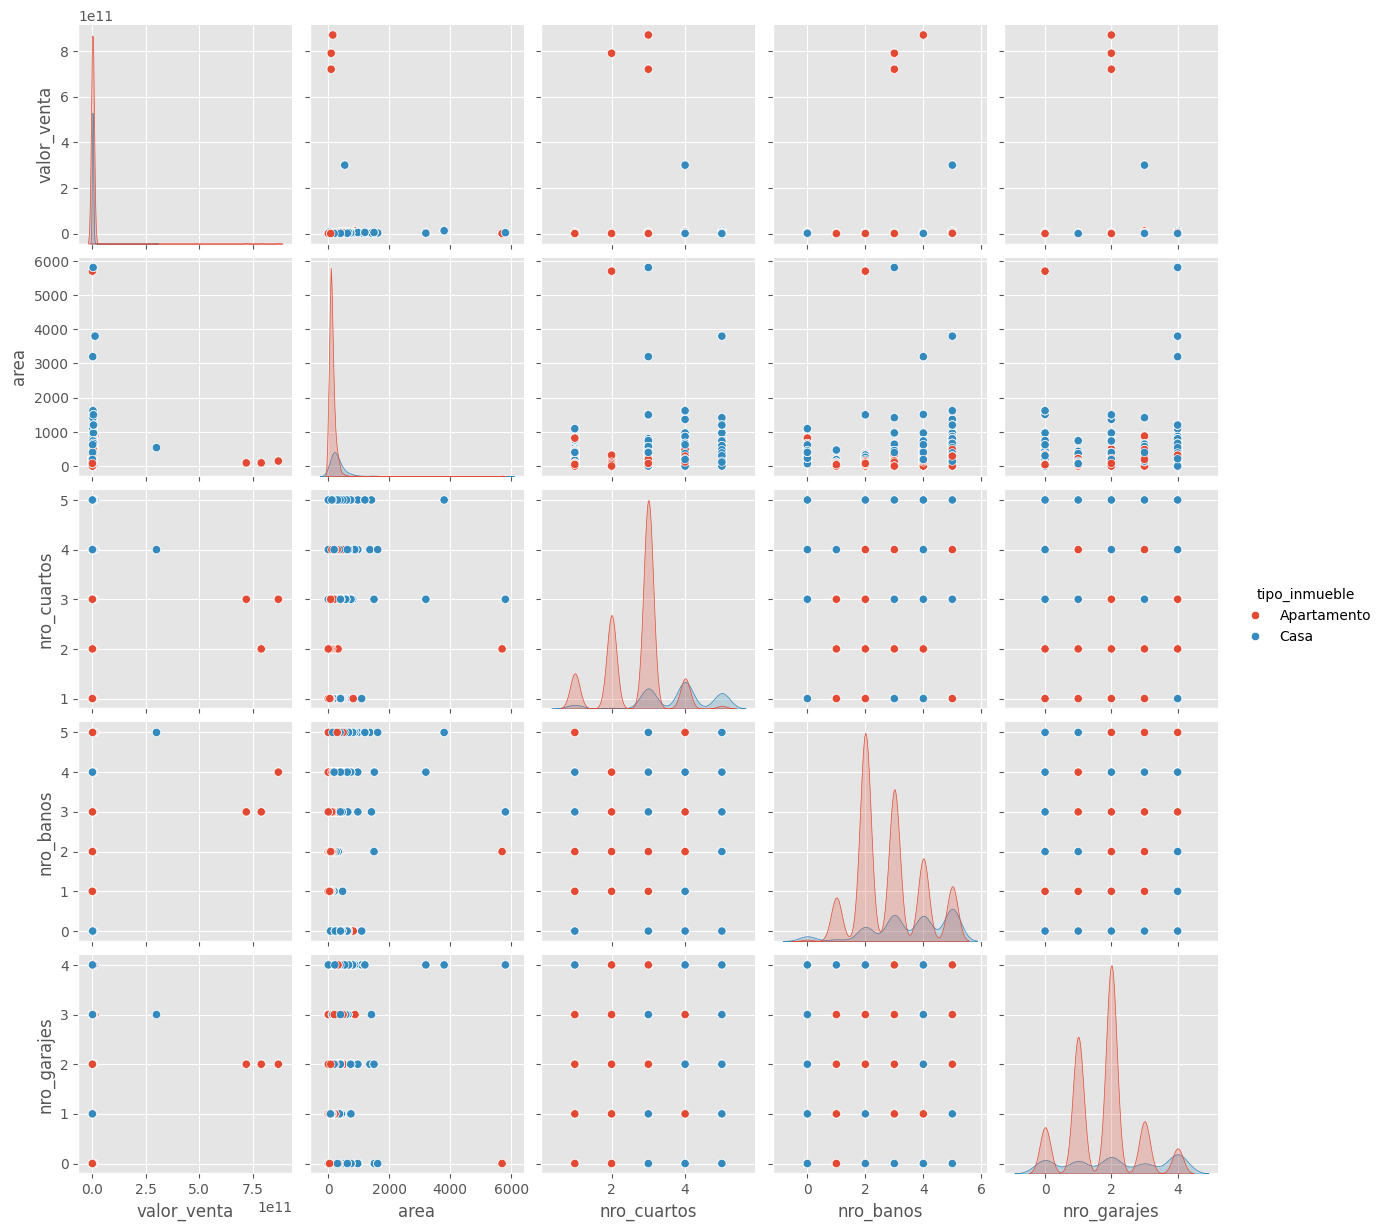

In [51]:
sns.pairplot(data_AED,hue='tipo_inmueble')

In [52]:
px.histogram(data_AED['valor_venta'],title='Distibución valor de venta')

In [53]:
shapiro(data_AED['valor_venta'])

ShapiroResult(statistic=0.029896485136306605, pvalue=1.8427548958017074e-114)

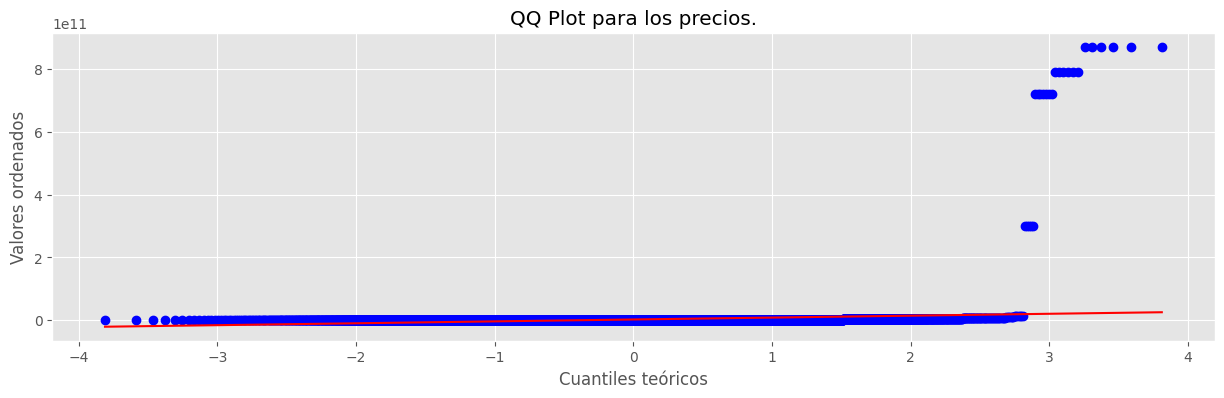

In [54]:
plt.figure(figsize = (15,4))
probplot(x=data_AED["valor_venta"], dist="norm", plot=plt)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los precios.")
plt.show()

De acuerdo con el histograma y el valor de Shapiro, podemos concluir que la variable objetivo, los datos no son normales y se rechaza la hipotesis nula. Se transformaran los datos para continuar con los 

In [55]:
px.histogram(np.log(data_AED['valor_venta']),title='Distribución del logaritmo natural del valor de venta')

In [56]:
data_AED['log_valor'] = np.log(data_AED['valor_venta'])
data_AED.head()

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio,log_valor
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS,19.768754
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL,19.066789
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza,20.394762
3,Casa,1018660600,173.0,3.0,4.0,1.0,Otros,Desconocido,Desconocido,20.741754
4,Apartamento,1850000000,190.0,3.0,4.0,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES,21.338451


In [57]:
px.histogram(data_AED,x='area')

In [58]:
shapiro(data_AED['area'])

ShapiroResult(statistic=0.358965146578923, pvalue=9.093789803604064e-104)

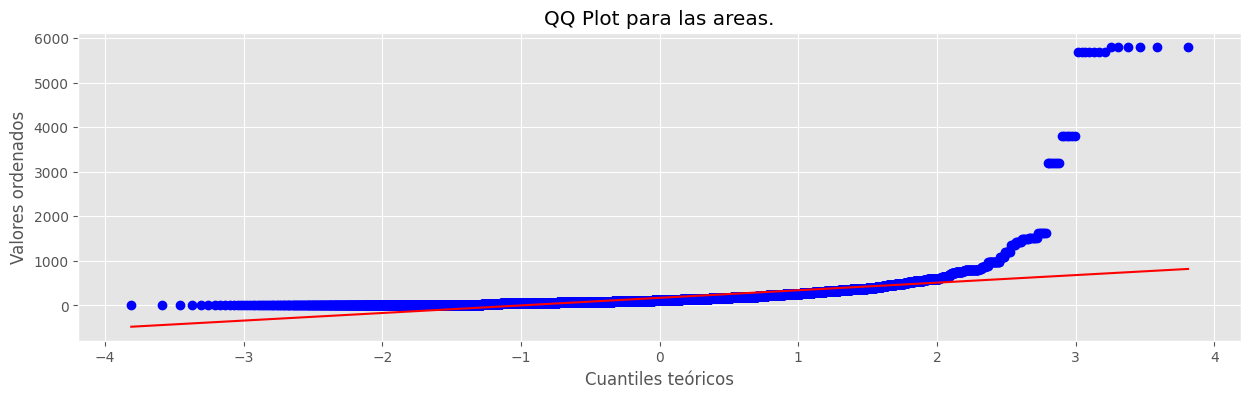

In [59]:
plt.figure(figsize = (15,4))
probplot(x=data_AED["area"], dist="norm", plot=plt)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para las areas.")
plt.show()

In [60]:
data_AED['log_area'] = np.log(data_AED['area'])
data_AED.head()

,tipo_inmueble,valor_venta,area,nro_cuartos,nro_banos,nro_garajes,zona,barrio,nombre_comun_barrio,log_valor,log_area
0,Apartamento,385000000,100.0,3.0,2.0,1.0,Chapinero,ALFONSO LOPEZ,GALERIAS,19.768754,4.605170
1,Apartamento,190810000,34.0,1.0,2.0,1.0,Norte,EL CODITO,EL REDIL,19.066789,3.526361
2,Apartamento,720000000,157.0,3.0,4.0,2.0,Noroccidente,NIZA SUBA,Cerros De Niza,20.394762,5.056246
3,Casa,1018660600,173.0,3.0,4.0,1.0,Otros,Desconocido,Desconocido,20.741754,5.153292
4,Apartamento,1850000000,190.0,3.0,4.0,2.0,Norte,CERROS DE LOS ALPES,CERROS DE LOS ALPES,21.338451,5.247024


In [61]:
corr_matriz = data_AED.drop(columns=['valor_venta','area']).select_dtypes(np.number).corr()
corr_matriz

,nro_cuartos,nro_banos,nro_garajes,log_valor,log_area
nro_cuartos,1.000000,0.570109,0.311413,0.328779,0.557855
nro_banos,0.570109,1.000000,0.582711,0.597714,0.641237
nro_garajes,0.311413,0.582711,1.000000,0.613594,0.583258
log_valor,0.328779,0.597714,0.613594,1.000000,0.695754
log_area,0.557855,0.641237,0.583258,0.695754,1.000000


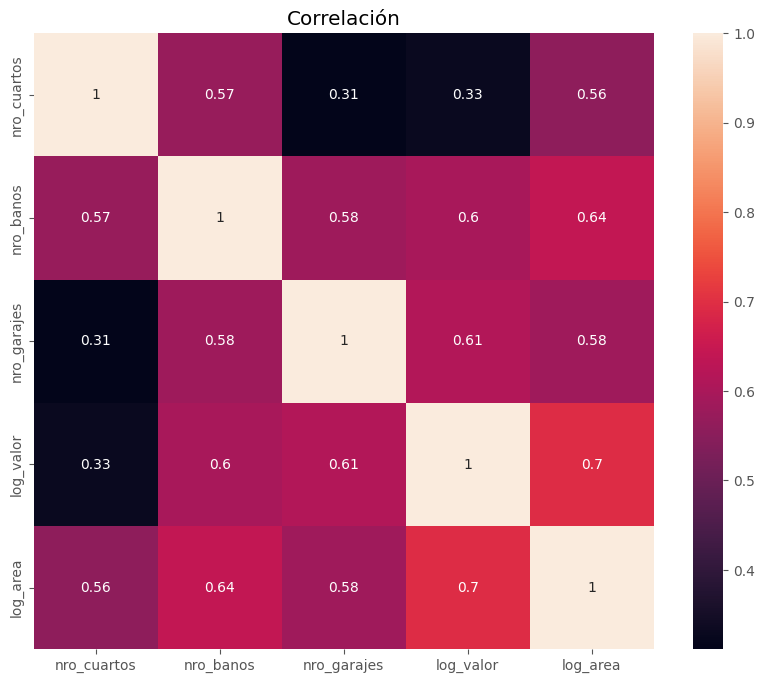

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matriz,annot=True)
plt.title('Correlación')
plt.show()

In [63]:
px.scatter(data_AED, x= 'log_valor',y='log_area',trendline="ols",trendline_color_override="red")